In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('android-games.csv')
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [4]:
data1 = data.copy()

In [8]:
data1.installs.unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [50]:
install_range = {'500.0 M': 500000000, '100.0 M': 100000000, '50.0 M': 50000000, '10.0 M': 10000000, '5.0 M': 5000000, '1.0 M':1000000,
       '1000.0 M':1000000000 , '500.0 k': 500000, '100.0 k': 1000000}

In [51]:
data1['Installs_num'] = data1['installs'].map(install_range)

In [52]:
data1

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,Installs_num
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False,1000000
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False,1000000
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False,5000000
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False,1000000


In [120]:
s = data1.groupby('category')['Installs_num'].sum().sort_values(ascending=False)
s

category
GAME ARCADE          6931000000
GAME CASUAL          6847000000
GAME ACTION          6650000000
GAME RACING          4640000000
GAME PUZZLE          3631000000
GAME SPORTS          3491000000
GAME SIMULATION      2871000000
GAME STRATEGY        2392000000
GAME BOARD           2038000000
GAME ADVENTURE       1888000000
GAME EDUCATIONAL     1595500000
GAME ROLE PLAYING    1449000000
GAME CARD            1401000000
GAME WORD            1385000000
GAME MUSIC           1286500000
GAME CASINO           788500000
GAME TRIVIA           705000000
Name: Installs_num, dtype: int64

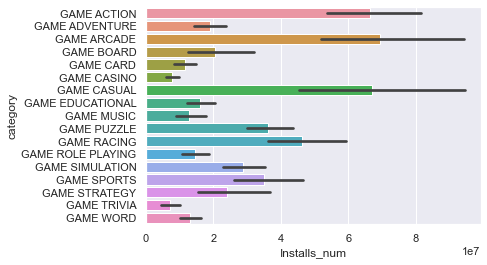

In [155]:
sns.barplot(y='category', x='Installs_num', data=data1)
plt.show()

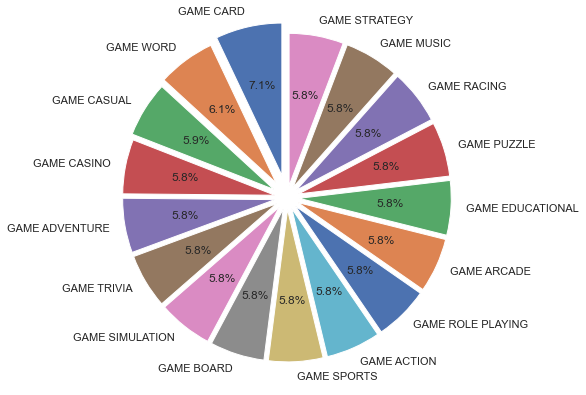

In [83]:
plt.figure(figsize=(14,7))
cat_labels = data1['category'].value_counts().index
plt.pie(data1['category'].value_counts().values, labels=cat_labels, autopct='%1.1f%%', startangle=90,explode=[0.15, 0.12, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08])

plt.show()

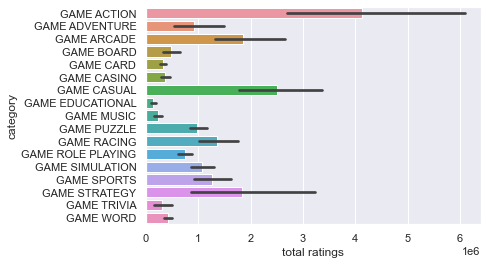

In [157]:
sns.barplot(y='category', x='total ratings', data=data1)
plt.show()

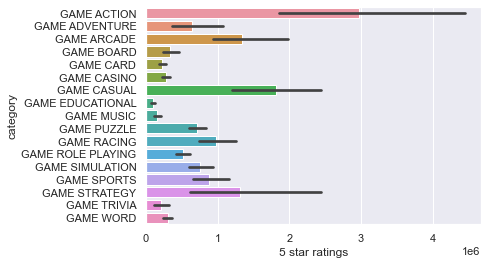

In [160]:
sns.barplot(x='5 star ratings', y='category', data=data1)
plt.show()

In [164]:
np.unique(data1.paid, return_counts=True)

(array([False,  True]), array([1723,    7], dtype=int64))

In [168]:
import plotly.express as px
px.sunburst(data1.head(10), path=['title', 'category', 'paid'],
    values='average rating',
    color='average rating')